In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install folium
from folium.plugins import MarkerCluster
import folium
from matplotlib import gridspec
from IPython.display import IFrame
!pip install mplleaflet
import mplleaflet
from IPython.display import HTML

C:\Users\patel\AppData\Local\Temp\ipykernel_4160\3110197580.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
data = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\Electric_Vehicle_Population_Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\patel\\OneDrive\\Desktop\\Electric_Vehicle_Population_Data.csv'

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166800 entries, 0 to 166799
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         166800 non-null  object 
 1   County                                             166795 non-null  object 
 2   City                                               166795 non-null  object 
 3   State                                              166800 non-null  object 
 4   Postal Code                                        166795 non-null  float64
 5   Model Year                                         166800 non-null  int64  
 6   Make                                               166800 non-null  object 
 7   Model                                              166800 non-null  object 
 8   Electric Vehicle Type                              166800 non-null  object

In [5]:
data.nunique()

VIN (1-10)                                            10316
County                                                  187
City                                                    704
State                                                    44
Postal Code                                             836
Model Year                                               22
Make                                                     39
Model                                                   138
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       166800
Vehicle Location                                        835
Electric Utility                                         76
2020 Census Tract                       

In [6]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

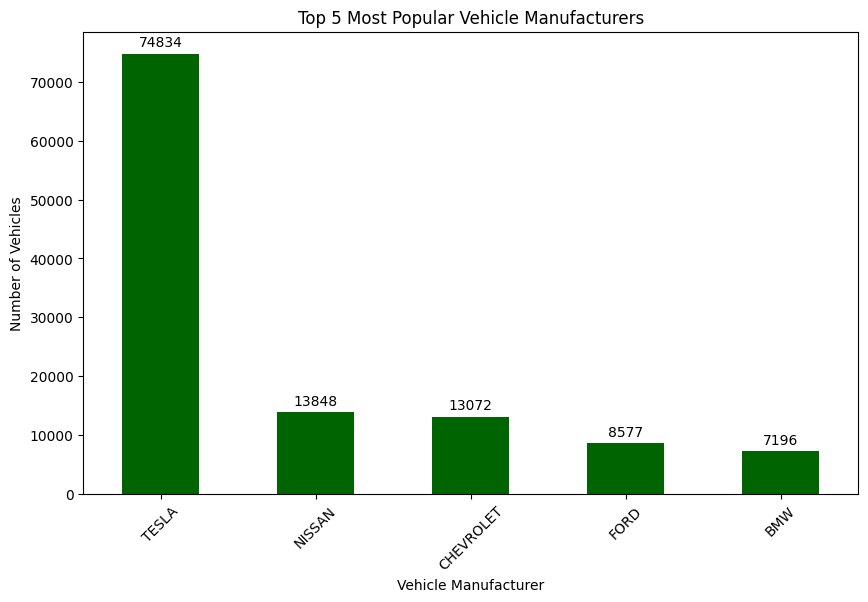

In [7]:
# Solution - 1

import matplotlib.pyplot as plt

# Calculate manufacturer counts
manufacturer_counts = data.groupby('Make').size().sort_values(ascending=False).head(5)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = manufacturer_counts.plot(kind='bar', color='darkgreen', ax=ax)

# Add labels and title
ax.set(xlabel='Vehicle Manufacturer', ylabel='Number of Vehicles', title='Top 5 Most Popular Vehicle Manufacturers')

# Add data labels
for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height), xytext=(0, 3), 
                textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [8]:
print(data["Electric Vehicle Type"].value_counts())

Electric Vehicle Type
Battery Electric Vehicle (BEV)            130293
Plug-in Hybrid Electric Vehicle (PHEV)     36507
Name: count, dtype: int64


Model Year    2019    2020     2021     2022     2023
Make                                                 
BMW          325.0   175.0    663.0    924.0   1680.0
CHEVROLET   1142.0  1165.0    381.0    905.0   2588.0
FORD         148.0    72.0    900.0   1716.0   2434.0
NISSAN      1376.0   686.0    687.0    948.0   1286.0
TESLA       4714.0  6955.0  10890.0  13707.0  24979.0


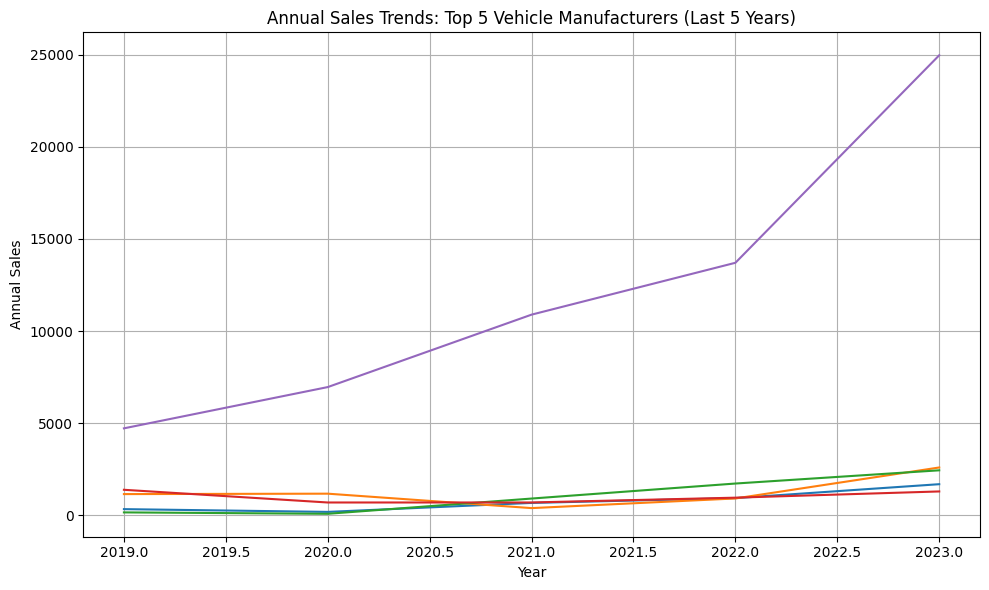

In [9]:
# Solution - 2

# Group the data by 'Make' and count the occurrences, then sort in descending order
manufacturers_count = data.groupby('Make').size().sort_values(ascending=False)

# Select the top 5 manufacturers
top_5_manufacturers = manufacturers_count.head(5).index

# Filter the data for the top 5 manufacturers
filtered_data = data[data['Make'].isin(top_5_manufacturers)]

# Extract annual sales data for the past 5 years for each manufacturer
past_5_years = range(2019, 2024)  # Assuming years are from 2019 to 2023

# Group by 'Make' and 'Model Year', count the 'DOL Vehicle ID', unstack, and filter for the past 5 years
sales_data = (
    filtered_data.groupby(['Make', 'Model Year'])['DOL Vehicle ID']
    .count()
    .unstack()
    .loc[:, past_5_years]
)
# Display the sales_data
print(sales_data)

# Set up the line chart
plt.figure(figsize=(10, 6))

# Plot sales data for each manufacturer
for manufacturer in sales_data.index:
    plt.plot(past_5_years, sales_data.loc[manufacturer], label=manufacturer)

# Set the x-axis label and y-axis label
plt.xlabel('Year')
plt.ylabel('Annual Sales')
plt.title('Annual Sales Trends: Top 5 Vehicle Manufacturers (Last 5 Years)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

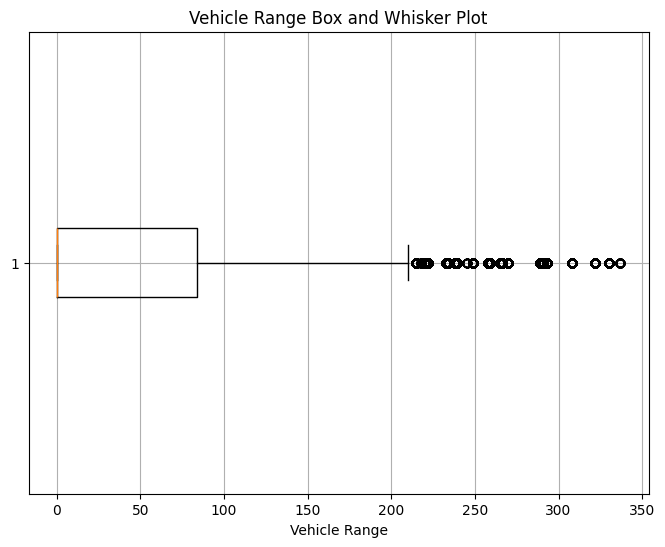

Minimum Value: 0
First Quartile (Q1): 0.0
Median (Q2): 0.0
Third Quartile (Q3): 84.0
Maximum Value: 337


In [12]:
# Solution - 3

import numpy as np
vehicle_range_data = data["Electric Range"]

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create the box and whisker plot horizontally
ax.boxplot(vehicle_range_data, vert=False)

# Set plot title and labels
ax.set_title('Vehicle Range Box and Whisker Plot')
ax.set_xlabel('Vehicle Range')

# Add gridlines
ax.grid(True)

# Display the plot
plt.show()

#Calculate key values
min_value = np.min(vehicle_range_data)
q1 = np.percentile(vehicle_range_data, 25)
median = np.median(vehicle_range_data)
q3 = np.percentile(vehicle_range_data, 75)
max_value = np.max(vehicle_range_data)

print("Minimum Value:", min_value)
print("First Quartile (Q1):", q1)
print("Median (Q2):", median)
print("Third Quartile (Q3):", q3)
print("Maximum Value:", max_value)

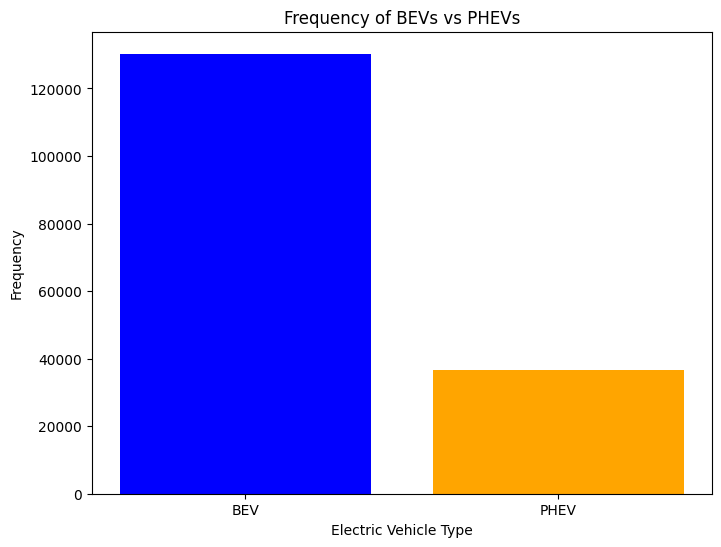

In [16]:
#Solution - 4

# for counting frequency of BEVs and PHEVs
bev_count = sum(data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)')
phev_count = sum(data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)')

# Create a bar chart
vehicle_types = ['BEV', 'PHEV']
vehicle_counts = [bev_count, phev_count]

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot
bars = ax.bar(vehicle_types, vehicle_counts, color=['blue', 'orange'])

# Set labels and title
ax.set_xlabel('Electric Vehicle Type')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of BEVs vs PHEVs')

# Show the plot
plt.show()

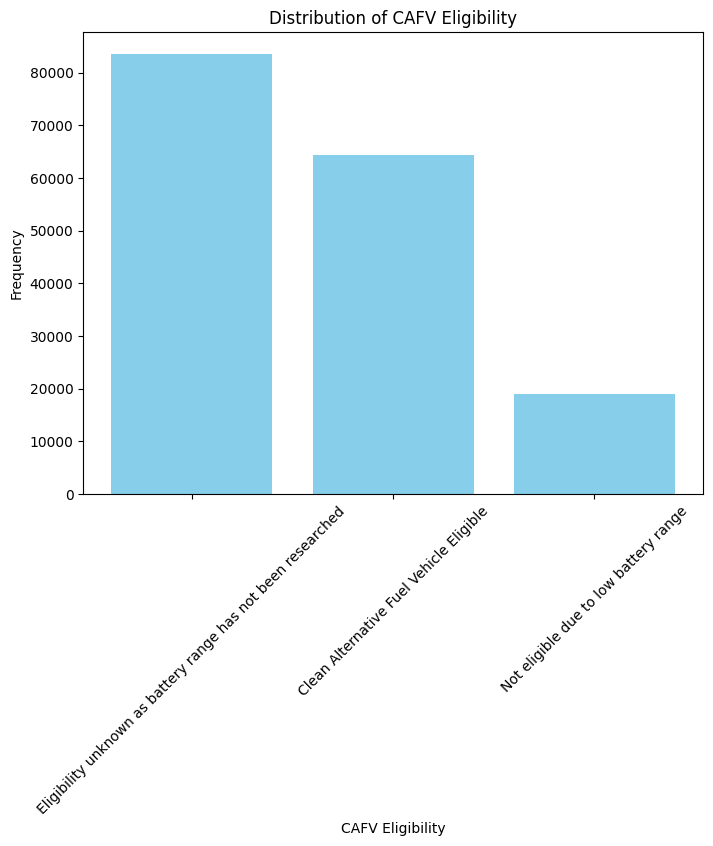

In [17]:
# Solution - 5

# Generate a summary of the count for each unique value in the specified column
value_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Visualize the distribution with a bar chart
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a bar chart representing the frequency of each unique value
ax.bar(value_counts.index, value_counts, color='skyblue')

# Label the axes
ax.set_xlabel('CAFV Eligibility')
ax.set_ylabel('Frequency')

# Set the title
ax.set_title('Distribution of CAFV Eligibility')

# Rotate x-axis labels for improved readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Top 5 models
['MODEL Y', 'MODEL 3', 'LEAF', 'MODEL S', 'BOLT EV']


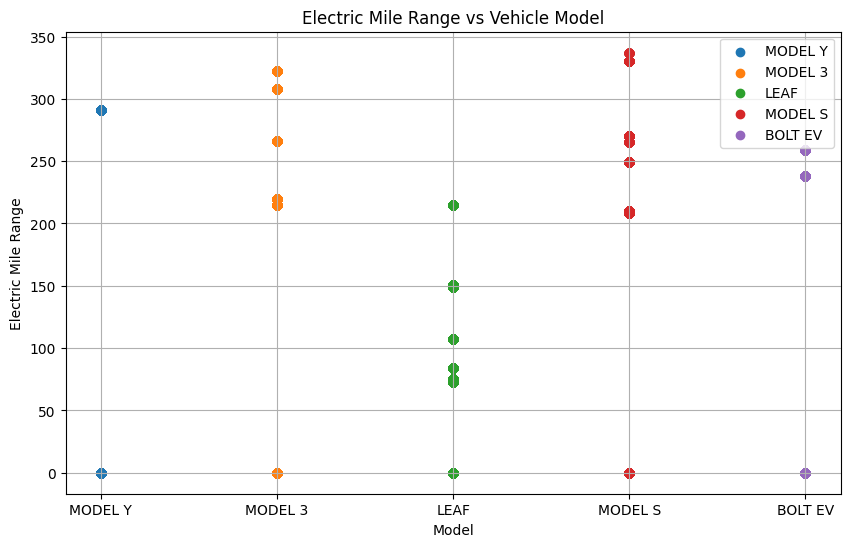

In [18]:
# Solution - 6

# Find the top 5 most popular vehicle models
top_models_while = data['Model'].value_counts().head(5).index.tolist()

print("Top 5 models")
print(top_models_while)

# Filter the DataFrame for only the top 5 models
df_top_models_while = data[data['Model'].isin(top_models_while)]

# Create a scatter plot using a while loop
plt.figure(figsize=(10, 6))
i = 0
while i < len(top_models_while):
    model_while = top_models_while[i]
    plt.scatter(df_top_models_while[df_top_models_while['Model'] == model_while]['Model'],
                df_top_models_while[df_top_models_while['Model'] == model_while]['Electric Range'],
                label=model_while)
    i += 1

plt.xlabel('Model')
plt.ylabel('Electric Mile Range')
plt.title('Electric Mile Range vs Vehicle Model')
plt.legend()
plt.grid(True)
plt.show()


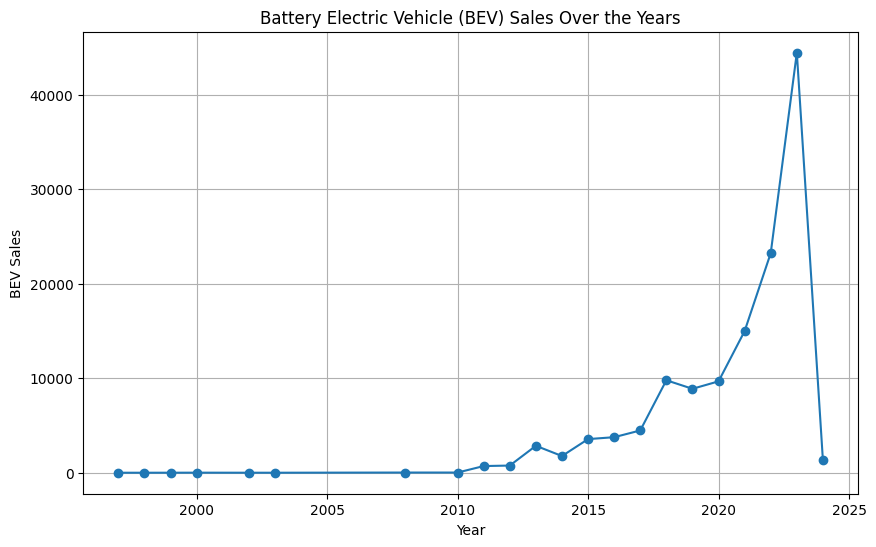

In [19]:
# Solution - 7

# Isolate Battery Electric Vehicles (BEVs) and store in a new DataFrame
bev_data_selection = data[data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Group BEV sales data by year
bev_sales_by_year_group = bev_data_selection.groupby('Model Year').size()

# Create a line chart to visualize BEV sales over the years
import matplotlib.pyplot as custom_plot_library
custom_plot_library.figure(figsize=(10, 6))
custom_plot_library.plot(bev_sales_by_year_group.index, bev_sales_by_year_group.values, marker='o', linestyle='-')
custom_plot_library.xlabel('Year')
custom_plot_library.ylabel('BEV Sales')
custom_plot_library.title('Battery Electric Vehicle (BEV) Sales Over the Years')
custom_plot_library.grid(True)
custom_plot_library.show()


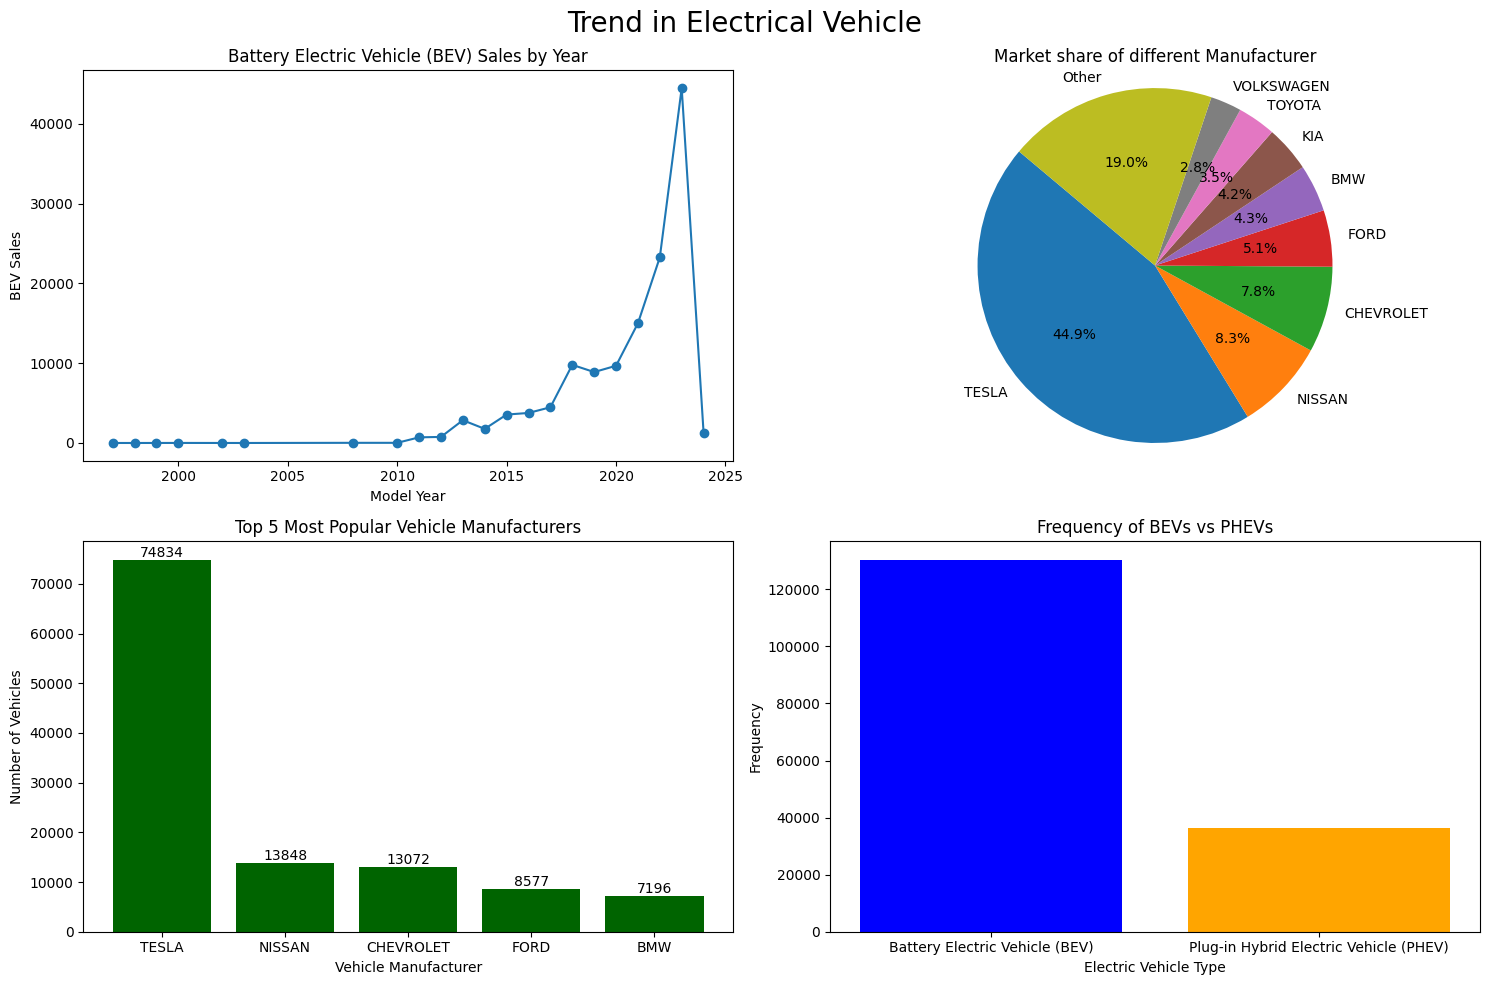

In [20]:
# Solution - 8

import matplotlib.pyplot as plt
import pandas as pd

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Trend in Electrical Vehicle', fontsize=20)

# Subplot 1: BEV Sales by Year
axs[0, 0].set_title('Battery Electric Vehicle (BEV) Sales by Year')
df_bev = data[data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
bev_sales_by_year = df_bev.groupby('Model Year').size()
axs[0, 0].plot(bev_sales_by_year.index, bev_sales_by_year.values, marker='o', linestyle='-')
axs[0, 0].set_xlabel('Model Year')
axs[0, 0].set_ylabel('BEV Sales')

# Subplot 2: Market Share of Different Manufacturers
axs[0, 1].set_title('Market share of different Manufacturer')
value_counts = data['Make'].value_counts()
top5 = value_counts.head(8)
other_count = value_counts.iloc[8:].sum()
top5['Other'] = other_count
axs[0, 1].pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].axis('equal')

# Subplot 3: Top 5 Most Popular Vehicle Manufacturers
axs[1, 0].set_title('Top 5 Most Popular Vehicle Manufacturers')
manufacturer_counts = data['Make'].value_counts().head(5)
bars = axs[1, 0].bar(manufacturer_counts.index, manufacturer_counts.values, color='darkgreen')
axs[1, 0].set_xlabel('Vehicle Manufacturer')
axs[1, 0].set_ylabel('Number of Vehicles')
for bar in bars:
    height = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

# Subplot 4: Frequency of BEVs vs PHEVs
axs[1, 1].set_title('Frequency of BEVs vs PHEVs')
electric_vehicle_counts = data['Electric Vehicle Type'].value_counts()
axs[1, 1].bar(electric_vehicle_counts.index, electric_vehicle_counts.values, color=['blue', 'orange'])
axs[1, 1].set_xlabel('Electric Vehicle Type')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

